In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
import pandas as pd

df = pd.read_csv("dataset/avocado.csv")
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)


In [5]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
df['region'] = encoder.fit_transform(df['region'])


In [6]:
X = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE  :", mse)
print("RMSE :", rmse)
print("R2 Score:", r2)


MSE  : 0.025482534978797853
RMSE : 0.15963249975740482
R2 Score: 0.84139739611005


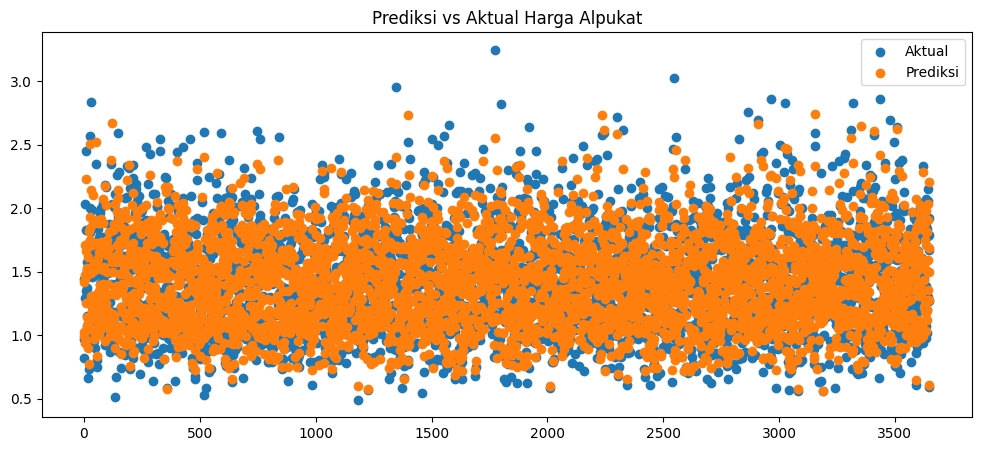

In [10]:
plt.figure(figsize=(12,5))
plt.scatter(range(len(y_test)), y_test, label='Aktual')
plt.scatter(range(len(y_test)), y_pred, label='Prediksi')
plt.legend()
plt.title("Prediksi vs Aktual Harga Alpukat")
plt.show()


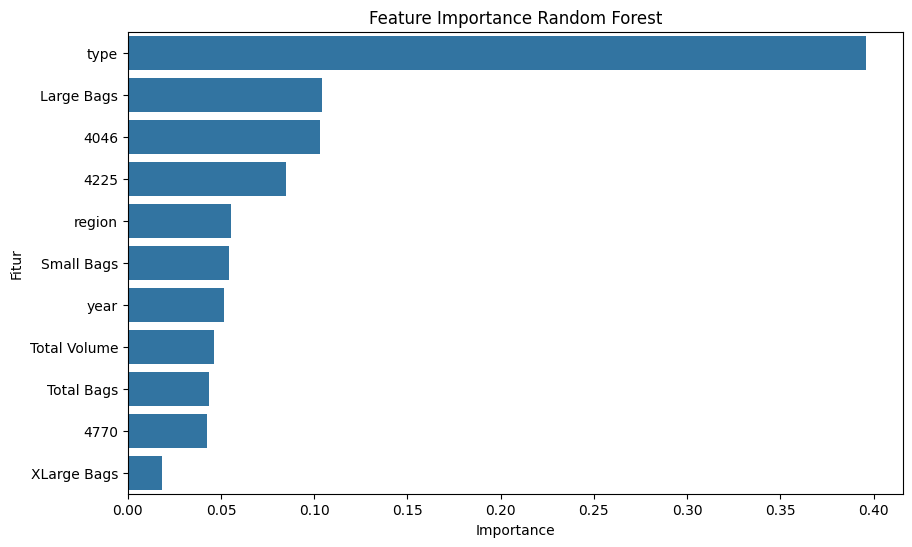

,Fitur,Importance
8,type,0.395861
6,Large Bags,0.104208
1,4046,0.102978
2,4225,0.085126
10,region,0.055221
5,Small Bags,0.054046
9,year,0.051786
0,Total Volume,0.046129
4,Total Bags,0.043618
3,4770,0.042712


In [11]:
importance = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Fitur', data=importance)
plt.title("Feature Importance Random Forest")
plt.show()

importance


In [12]:
import joblib

joblib.dump(model, "model/avocado_model.pkl")


['model/avocado_model.pkl']